In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import Task     #import values from previous file
import importlib

importlib.reload(Task)

         Date  Q calculated  Q given  Infiltration
0  2023-06-15      0.402000    0.402           0.0
1  2023-06-16      0.339905    0.454          21.7
2  2023-06-17      0.429803    0.798           0.9
3  2023-06-18      0.369320    0.817          16.3
4  2023-06-19      0.419238    3.250          37.6
5  2023-06-20      0.601222    5.070           4.5
6  2023-06-21      0.537885    5.320           2.0
7  2023-06-22      0.467925    5.230           0.1
8  2023-06-23      0.396304    4.570           0.1
9  2023-06-24      0.335745    4.050           2.5
10 2023-06-25      0.300290    4.260          17.6
11 2023-06-26      0.369402    4.090           0.1
12 2023-06-27      0.312999    3.540           2.0
13 2023-06-28      0.277776    3.160           0.3
14 2023-06-29      0.236838    2.720           1.5
15 2023-06-30      0.210098    2.380           0.0
16 2023-07-01      0.177646    1.970           0.0
17 2023-07-02      0.150206    1.450           0.0
18 2023-07-03      0.127004    

<module 'Task' from 'e:\\GIT_UoS_UoA\\UoS_UoA\\Task.py'>

<h1>Outflow plot</h1>

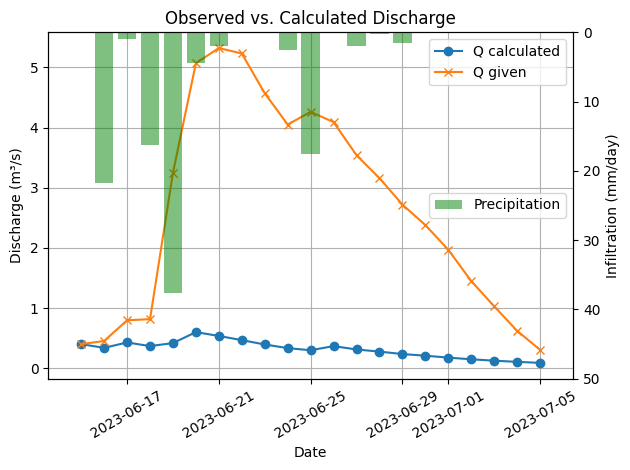

In [81]:
fig,ax1=plt.subplots()

ax1.plot(Task.df['Date'],Task.df['Q calculated'],label='Q calculated',marker='o')
ax1.plot(Task.df['Date'],Task.df['Q given'],label='Q given',marker='x')
ax1.set_xlabel('Date')
plt.xticks(rotation=30)
ax1.set_ylabel('Discharge (m³/s)')
ax1.set_title('Observed vs. Calculated Discharge')
ax1.grid(True)



ax2 = ax1.twinx()
ax2.bar(Task.df['Date'], Task.df['Infiltration'], color='green', alpha=0.5, label='Precipitation')
ax2.set_ylabel('Infiltration (mm/day)')
ax2.set_ylim(top=50)
ax2.invert_yaxis()
ax2.legend(loc=7)
ax1.legend(loc=1)
fig.tight_layout()

In [80]:
rms = np.sqrt(mean_squared_error(Task.df['Q given'], Task.df['Q calculated']))

def NSE(a1,a2):
    denominator = np.sum((a1 - np.mean(a1)) ** 2)
    numerator = np.sum((a2 - a1) ** 2)
    nse_val = 1 - numerator / denominator
    return nse_val

nse=NSE(Task.df['Q given'],Task.df['Q calculated'])

print('The RMSE and NSE are', rms,'&',nse)

The RMSE and NSE are 2.8472299221950013 & -1.7355221544295714
